# Intermediate clustering analyses with Python -- Pokemon data

This notebook presents clustering analyses of the Pokemon data (https://www.kaggle.com/abcsds/pokemon). The analyses start with the basic k-meand and hierarchical clustomering on the numerical features only (to speed-up calculations only the first 100 rows are used in this notebook). The analyses then proceed to dimentionality reduction with Principle Component Analyses (PCA). PCAs are finally used to cluser based on both numerical and categorical features. Finally, the examples of PAM clustering and silhouette plots are presented. 

Note: if PCA fails to converge, re-run the corredsponding cell (possibly multiple times) until it converges and then proceed with the rest of the code. This is due to the reduced size of the data and random number generation. 

In [1]:
#!pip3 install pandas numpy sklearn matplotlib pyclustering seaborn --user 

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mp
import matplotlib.pyplot as plt
import pyclustering

%matplotlib inline

## 1. Reading data and feature engineering.

This section contains the following steps:
- Reading dataset, taking 100 first observations.
- Selecting numerical columns, i.e. HP, Attack, Defense, Sp.Atk, Sp.Def, Speed.

In [3]:
data_src = pd.read_csv('0910 CSV data -- pokemon.csv')
print("Shape Source = {}.".format(data_src.shape))

data_src_100 = data_src[:100]
print("Shape New = {}.".format(data_src_100.shape))

data_src_100.head()

Shape Source = (800, 13).
Shape New = (100, 13).


,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
data_numerical_100 = data_src_100[['Speed', 'Defense', 'HP', 'Attack', 'Sp. Atk', 'Sp. Def']]
data_numerical_100.head()

,Speed,Defense,HP,Attack,Sp. Atk,Sp. Def
0,45,49,45,49,65,65
1,60,63,60,62,80,80
2,80,83,80,82,100,100
3,80,123,80,100,122,120
4,65,43,39,52,60,50


## 2. k-Means clustering.

This section does the following steps:
- Fitting k-Means with parameters n_starts = 20, max_iter = 50.
- Compute withiness for number of clusters i = 1 to 15.
- Scree plot for cluster amount selection.
- Selecting number of clusters k = 3. Fit model, print clusters and centers.
- Visualization: Scatter Plot showing Speed vs Defence.
- Snake plot for parameters: HP, Attack, Defence, Spp.Atk, Sp.Def, Speed.

Resources used for preparing the code below:
- https://seaborn.pydata.org/generated/seaborn.pointplot.html

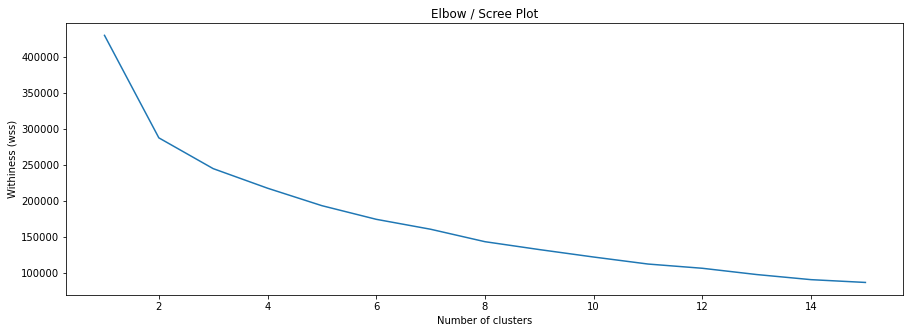

In [5]:
from sklearn.cluster import KMeans

# Compute withiness (wss) for different amout of clusters.
wss = []
for n_clusters in range(1, 16):
    kmeans_tmp = KMeans(n_clusters=n_clusters, n_init=20, max_iter=50)
    kmeans_tmp.fit(data_numerical_100)
    wss.append(kmeans_tmp.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(list(range(1, 16)), wss)
plt.xlabel("Number of clusters")
plt.ylabel("Withiness (wss)")
plt.title("Elbow / Scree Plot")
plt.show()

In [6]:
km_num_100 = KMeans(n_clusters=3, n_init=20, max_iter=50)
km_num_100.fit(data_numerical_100)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centers_100_df_km_num = pd.DataFrame(km_num_100.cluster_centers_)
centers_100_df_km_num.columns = data_numerical_100.columns

print("Assigned Labels: \n\n", km_num_100.labels_)
print("\nCluster Centers: ")
centers_100_df_km_num.head()

Assigned Labels: 

 [0 2 1 1 0 2 1 1 1 0 2 1 1 0 0 2 0 0 2 2 0 0 2 1 0 2 0 2 0 2 0 2 0 2 0 0 2
 0 0 2 0 1 0 2 0 2 0 2 0 2 1 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0 2 2 0 1 1 1 0 2
 2 0 2 2 0 2 0 2 2 2 2 0 1 1 0 1 0 0 2 0 2 0 2 0 1 0]

Cluster Centers: 


,Speed,Defense,HP,Attack,Sp. Atk,Sp. Def
0,53.500000,47.909091,47.795455,54.113636,47.363636,45.590909
1,84.315789,94.421053,74.473684,81.473684,117.894737,88.421053
2,78.567568,69.837838,71.189189,87.567568,67.486486,73.783784


In [8]:
# This function performs scatterplot and would be further reused.
def plot_scatter(data, labels, show=True):
    plt.title("Clusterization")
    plt.scatter(data['Speed'], data['Defense'], c=labels, marker='o')
    plt.xlabel("Speed")
    plt.ylabel("Defence")
    if show:
        plt.show()

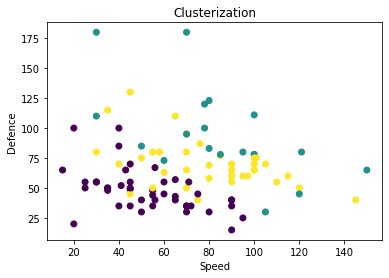

In [9]:
plot_scatter(data_numerical_100, km_num_100.labels_)

In [10]:
import seaborn as sns
import copy


# This function shows snake plot and would be further reused.
def plot_snake(centers_df):
    transformed_list = []
    for index, row in centers_df.iterrows():
        for key, item in row.items():
            entry = [key, item, 'cluster_{}'.format(index + 1)]
            transformed_list.append(entry)
    transformed_df = pd.DataFrame(transformed_list)
    transformed_df.columns = ['Feature', 'Value', 'Cluster']
    sns.pointplot(x='Feature', y='Value', hue='Cluster', data=transformed_df)
    plt.title("Snake Plot")
    plt.show()

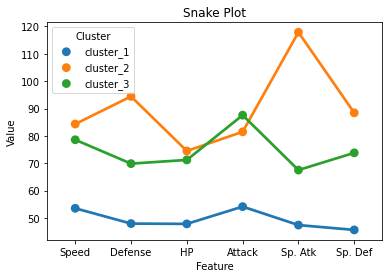

In [11]:
plot_snake(centers_100_df_km_num)

## 3. Hierarchical clustering.

This section does the following steps:
- Dendrogram plot for Agglomerative Clustering. 
- Fitting hierarchical algorithm with parameters k = 3, method = complete.
- Print clusters.

Resources:
- (Dendrogram Tutorial) https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

In [12]:
from scipy.cluster.hierarchy import dendrogram


# This function plots dendrogram and can be further reused.
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram.

    # Create the counts of samples under each node.
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram.
    dendrogram(linkage_matrix, **kwargs)

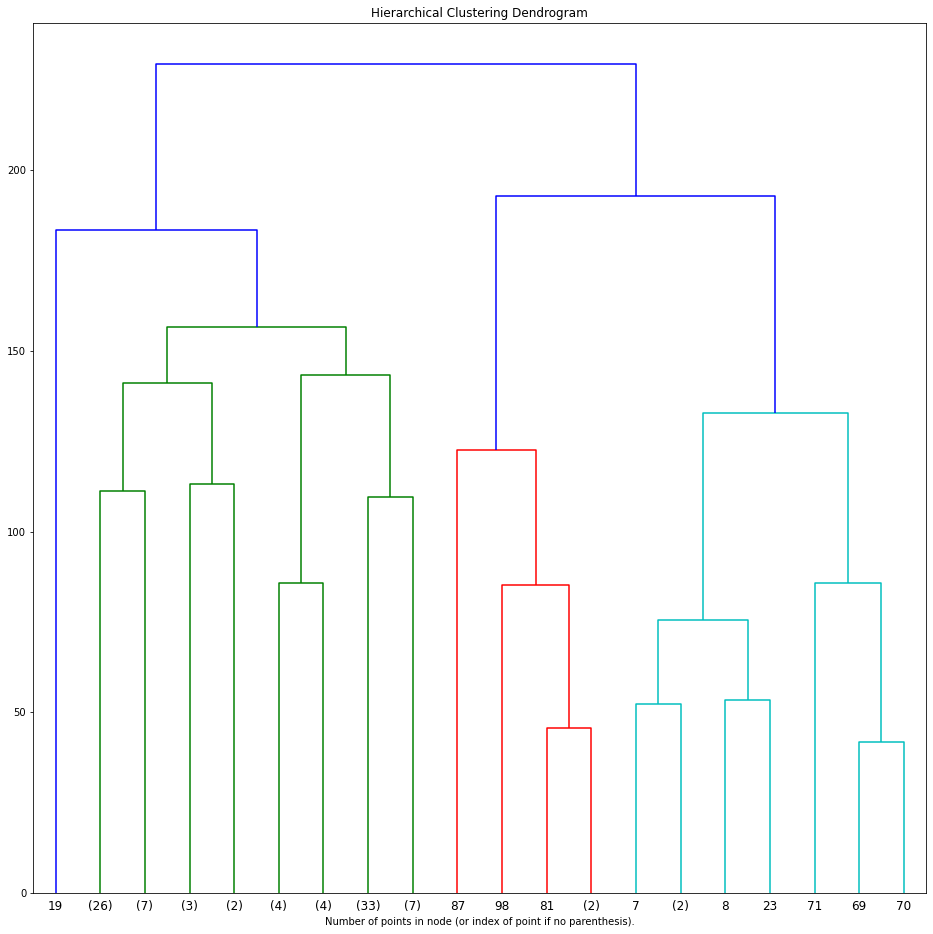

In [13]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
model.fit(data_numerical_100)

plt.figure(figsize=(16,16))
plt.title('Hierarchical Clustering Dendrogram')

# Plot the top seven levels of the dendrogram.
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [14]:
cut_num_100 = AgglomerativeClustering(
    distance_threshold=None, n_clusters=3, linkage='complete').fit(data_numerical_100)
print("Cluster Labels: ", cut_num_100.labels_)

Cluster Labels:  [0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0]


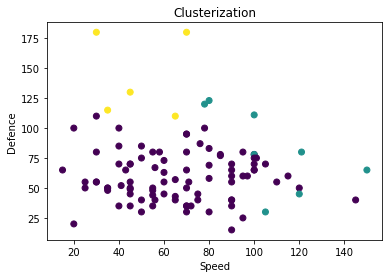

In [15]:
plot_scatter(data_numerical_100, cut_num_100.labels_)

## 4. Compare k-Means and Hierarchical clustering.

This section compares k-Means and agglomerative approaches, and does the following steps:

- Cross-tabulation.
- Scatter plot for defence vs speed.

In [16]:
print("Cross-Tabulation:")
pd.crosstab(cut_num_100.labels_, km_num_100.labels_)

Cross-Tabulation:


col_0,0,1,2
row_0,,,
0,44,9,34
1,0,8,0
2,0,2,3


In [17]:
# The following function plots two scatterplots and would be further reused.
def compare_scatter_plot(data, label_1, title_1, label_2, title_2):
    plt.figure(figsize=(20, 8))
    plt.subplot(121)
    plot_scatter(data, label_1, False)
    plt.title(title_1)
    plt.subplot(122)
    plot_scatter(data, label_2, False)
    plt.title(title_2)
    plt.show()

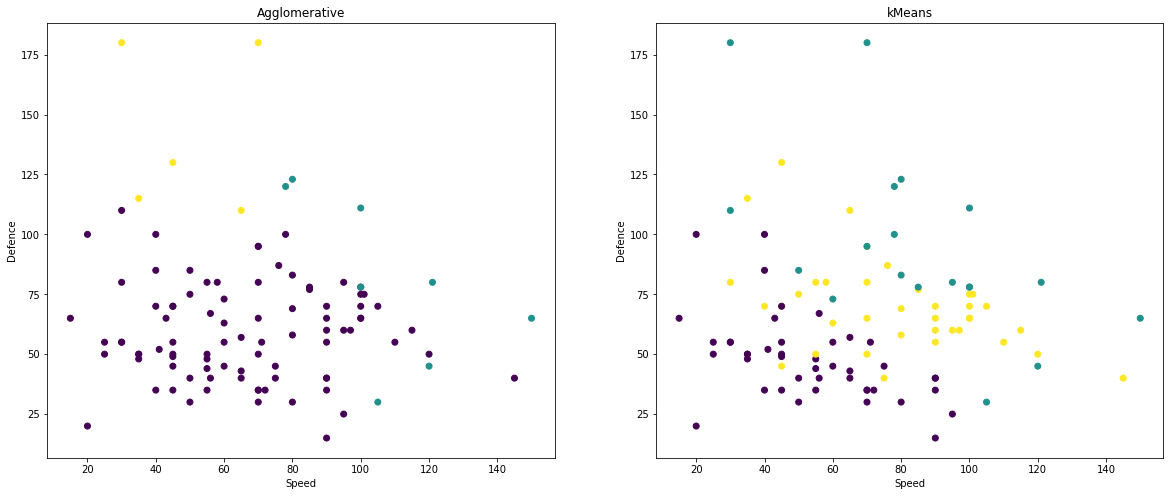

In [18]:
compare_scatter_plot(data_numerical_100, cut_num_100.labels_, "Agglomerative", km_num_100.labels_, "kMeans")

## 5. Scaling.

This section performs the following steps:
- Compute and show feature means.
- Compute and show feature stds.
- Scale the data.
- Fit kmeans on scaled data.
- Fit hierarchical clustering on scaled data.
- Cross-tabulation.
- Compare approaces as two scatterplots.

Resources:
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [19]:
np.mean(data_numerical_100, axis=0)

Speed      68.63
Defense    64.86
HP         61.52
Attack     71.69
Sp. Atk    68.21
Sp. Def    64.16
dtype: float64

In [20]:
np.std(data_numerical_100, axis=0)

Speed      28.045197
Defense    28.838523
HP         21.479516
Attack     24.855058
Sp. Atk    32.294363
Sp. Def    23.580382
dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_numerical_100)
scaled_numerical_100 = scaler.transform(data_numerical_100)

In [22]:
km_num_100_scl = KMeans(
    n_clusters=3, n_init=20, max_iter=50).fit(data_numerical_100)
cut_num_100_scl = AgglomerativeClustering(
    distance_threshold=None, n_clusters=3, linkage='complete').fit(data_numerical_100)
pd.crosstab(km_num_100_scl.labels_, cut_num_100_scl.labels_)

col_0,0,1,2
row_0,,,
0,36,1,3
1,44,0,0
2,7,7,2


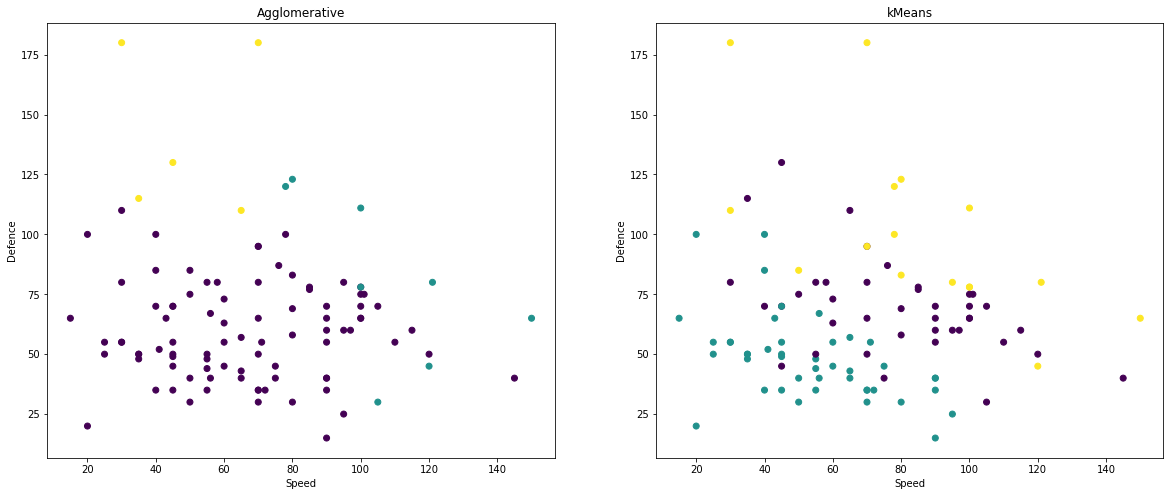

In [23]:
compare_scatter_plot(data_numerical_100, 
                     cut_num_100_scl.labels_, "Agglomerative", 
                     km_num_100_scl.labels_, "kMeans")

## 6. Dimensionality reduction: Principle Component Analyses, PCA.

This section performs the following steps:
- Plot explained variance as proportion for each component.
- Plot explained variance as cumulative proportion for each component.
- Plot exact values of explained variances for each component.
- Biplot of the data in the space of two first components.

Resources used for preparation:
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [25]:
from sklearn.decomposition import PCA

pca_num_100_all = PCA().fit(data_numerical_100)

explained_variance = pca_num_100_all.explained_variance_
explained_variance_exact_ratio = pca_num_100_all.explained_variance_ratio_
explained_variance_prefix_ratio = np.cumsum(explained_variance_exact_ratio)

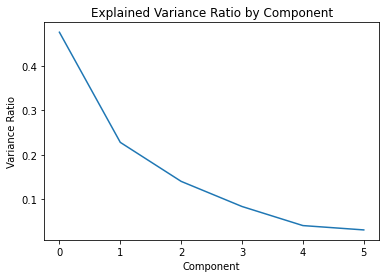

In [26]:
plt.title("Explained Variance Ratio by Component")
plt.plot(explained_variance_exact_ratio)
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.show()

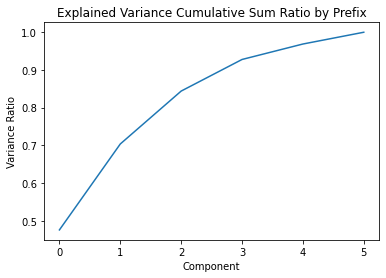

In [27]:
plt.title("Explained Variance Cumulative Sum Ratio by Prefix")
plt.plot(explained_variance_prefix_ratio)
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.show()

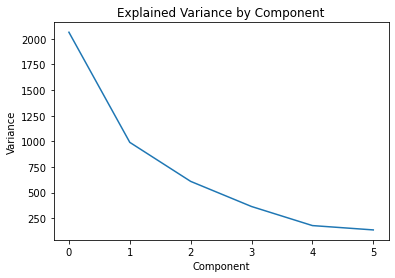

In [28]:
plt.title("Explained Variance by Component")
plt.plot(explained_variance)
plt.xlabel("Component")
plt.ylabel("Variance")
plt.show()

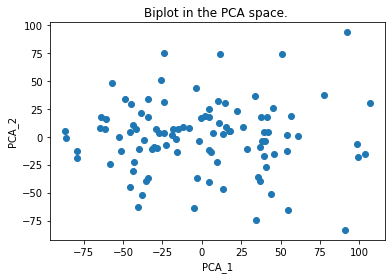

In [29]:
def make_pca_biplot(data, pca, suffix=""):
    data_pca = pca.fit_transform(data)
    plt.title("Biplot in the PCA space. " + suffix)
    plt.xlabel("PCA_1")
    plt.ylabel("PCA_2")
    plt.scatter(x=data_pca[:, 0].reshape(-1), y=data_pca[:, 1].reshape(-1))
    plt.show()

make_pca_biplot(data_numerical_100, PCA(n_components=2))

## 7. Scaling in PCA.

This section performs the following steps:
- Fit PCA with scaling=True.
- Fit PCA with scaling=False.
- Biplot on first two components with scaling.
- Biplot on first two components without scaling.
- Fit kMeans with PCA(scaling=True).
- Cross-tabulation of kMeans with PCA(scaling=True) vs base kMeans.
- Fit hierarchical clustering on data with PCA(scaling=True).
- Compare with cross-tabulation the previous and new hierarchical approaches.

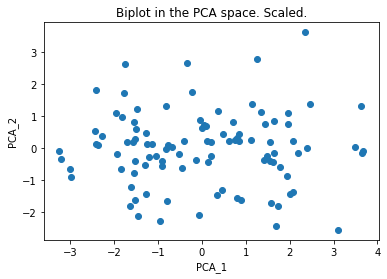

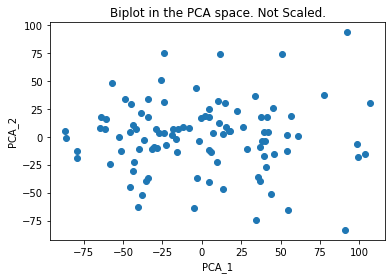

In [30]:
from sklearn.pipeline import make_pipeline

pca_num_100_2_scl = make_pipeline(StandardScaler(), PCA(n_components=2))
pca_num_100_2 = PCA(n_components=2)

make_pca_biplot(data_numerical_100, pca_num_100_2_scl, "Scaled.")
make_pca_biplot(data_numerical_100, pca_num_100_2, "Not Scaled.")

In [31]:
data_num_100_pca = pca_num_100_2_scl.transform(data_numerical_100)
km_num_100_pca = KMeans(
    n_clusters=3, n_init=20, max_iter=50).fit(data_num_100_pca)
cut_num_100_pca = AgglomerativeClustering(
    distance_threshold=None, n_clusters=3, linkage='complete').fit(data_num_100_pca)

In [32]:
pd.crosstab(km_num_100.labels_, km_num_100_pca.labels_)

col_0,0,1,2
row_0,,,
0,0,0,44
1,11,8,0
2,13,22,2


In [33]:
pd.crosstab(cut_num_100.labels_, cut_num_100_pca.labels_)

col_0,0,1,2
row_0,,,
0,54,30,3
1,1,7,0
2,2,0,3


## 8. Clustering with factors via PCA.

This section takes into account more features and performs the following steps:
- Combine Rare Categories (less than 5 occurences).
- One-hot encoding for categorical variables.
- PCA with scaling=True.
- Take 5 principle components.
- kMeans on 5 first PCA components.
- Cross-Tabulation with kMeans pokemon.
- Scatterplot Defence-Speed with no-pca standard kMeans.
- Snake plot on Top-5 PCA.

In [34]:
# This function combines rare categories and can be further reused.
def combine_rare_categories(df, column_list, threshold):
    for column_id in column_list:
        transform_keys = []
        for key, value  in df[column_id].value_counts().items():
            if value < threshold:
                transform_keys.append(key)
        for key in transform_keys:
            df[column_id][df[column_id] == key] = 'Other.{}.Type'.format(column_id)
    return df

In [35]:
data_mod_100 = data_src_100.drop(["Name", "ID", "Generation", "Legendary"], axis=1)
data_mod_100 = combine_rare_categories(data_mod_100, ['Type 1', 'Type 2'], 5)
for column in ['Type 1', 'Type 2']:
    data_mod_100[column] = data_mod_100[column].astype('category')
    
data_mod_100 = pd.get_dummies(data_mod_100)

C:\Users\ao37\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [36]:
pca_mod_100_5_scl = make_pipeline(StandardScaler(), PCA(n_components=5))
data_mod_100_pca = pd.DataFrame(pca_mod_100_5_scl.fit_transform(data_mod_100))
data_mod_100_pca.columns = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5']
km_mod_100_pca = KMeans(
    n_clusters=3, n_init=20, max_iter=50).fit(data_mod_100_pca)
pd.crosstab(km_num_100.labels_, km_mod_100_pca.labels_)

col_0,0,1,2
row_0,,,
0,41,0,3
1,1,15,3
2,3,26,8


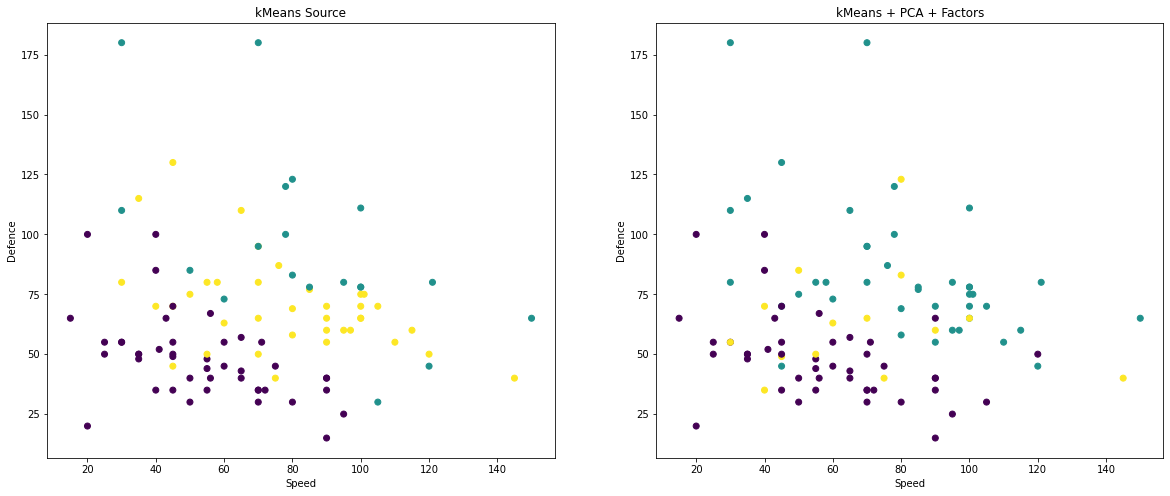

In [37]:
compare_scatter_plot(data_numerical_100, km_num_100.labels_, "kMeans Source", 
                     km_mod_100_pca.labels_, "kMeans + PCA + Factors")

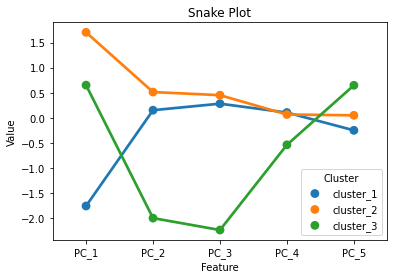

In [38]:
import copy

# This function helps to make snake plot and can be further reused.
def plot_snake_kmeans(algorithm, data):
    df_km = pd.DataFrame(algorithm.cluster_centers_)
    df_km.columns = copy.deepcopy(data.columns)
    plot_snake(df_km)
    return df_km
    
df_km_pca = plot_snake_kmeans(km_mod_100_pca, data_mod_100_pca)

## 9. Writing Results

This section saves some results. The following steps are performed:
- PCA transformation (Py_Pokemon_PCA.csv)
- k-Means centers (Py_Pokemon_PCA_k-means_centers.csv)
- k-Means clusters (Py_Pokemon_PCA-k-means_clusters.csv)

In [39]:
data_mod_100_pca.to_csv("Py_Pokemon_PCA.csv")
df_km_pca.to_csv("Py_Pokemon_PCA_k-means_centers.csv")
pd.DataFrame(km_mod_100_pca.labels_).to_csv("Py_Pokemon_PCA-k-means_clusters.csv")

## 10. PAM (Partitioning Around Medoids) + Silhouette Plot

This section explores alternative clustering methods. The following steps are performed:
- Fit medoids clustering.
- Silhouette plot for PAM.
- Silhouette plot for kMeans.

Resources used:
- Yellowbrick, for Silhouette Plots: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html#;
- Sklearn, Silhouete Plot example: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
- PyClustering Documentation: https://pyclustering.github.io/docs/0.9.3/html/index.html
- PyClustering Repo: https://github.com/annoviko/pyclustering

In [40]:
from pyclustering.cluster.kmedoids import kmedoids

sample_pokemon = []
for index, row in data_mod_100_pca.iterrows():
    entry = []
    for key, value in row.items():
        entry.append(value)
    sample_pokemon.append(entry)
    
initial_medoids_pokemon = [10, 20, 30]
kmedoids_instance_pokemon = kmedoids(sample_pokemon, initial_medoids_pokemon)
kmedoids_instance_pokemon.process()
clusters_pokemon = kmedoids_instance_pokemon.get_clusters()
labels_pam = [None for idx in range(100)]
for idx, items in enumerate(clusters_pokemon):
    for entry in items:
        labels_pam[entry] = idx

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# This function does Silhouette plot and can be further reused.
def plot_silhouette(X, cluster_labels, n_clusters, algo_name):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
  
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1.
    
    ax1.set_xlim([-0.3, 0.8])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "the average silhouette_score is :", silhouette_avg, "\b.")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[np.array(cluster_labels) == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(np.array(cluster_labels).astype(float) / n_clusters)
    ax2.scatter(np.array(X)[:, 0], np.array(X)[:, 1], marker='o', s=30, 
                c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for {} clustering on sample data ".format(algo_name) +
                  "with n_clusters = {}".format(n_clusters)),
                 fontsize=14, fontweight='bold')
    plt.show()

For n_clusters = 3 the average silhouette_score is : 0.1806463357105054 .


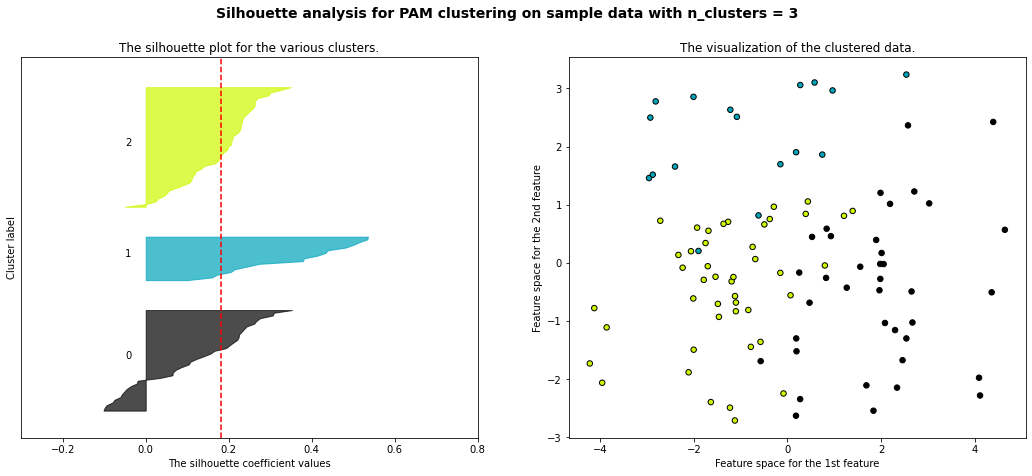

In [42]:
plot_silhouette(data_mod_100_pca, labels_pam, 3, "PAM")

For n_clusters = 3 the average silhouette_score is : 0.24608273684999404 .


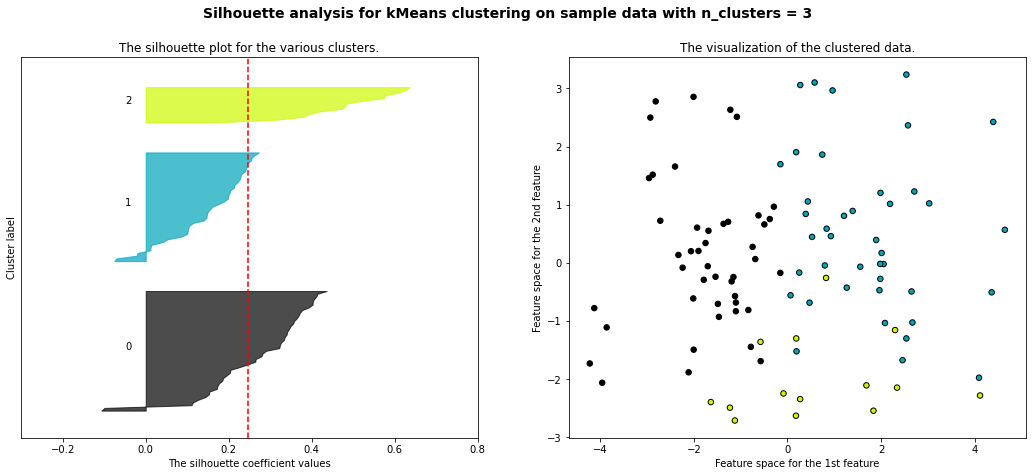

In [43]:
plot_silhouette(data_mod_100_pca, km_mod_100_pca.labels_, 3, "kMeans")